# PlaygroundML
---
# 1. Linear Regression

In [24]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

# Import my own linear regression class and sklearn's linear regression class
from linear_regression import MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge

## 1.1 Simple linear regression

First, let's fit a simple linear model by simulating some noisy data. The data will be generated as follows:

1. Draw `n_points` random $x$ values on the range $[0,1]$.
2. Compute the $y$ values from a linear function with Gaussian noise with $\sigma = 0.5$:
$$
f(x) = 2x + 1 + \epsilon
$$
$$
\epsilon \sim \mathcal{N}(0,0.5^2)
$$

### 1.1.1 Generate noisy data

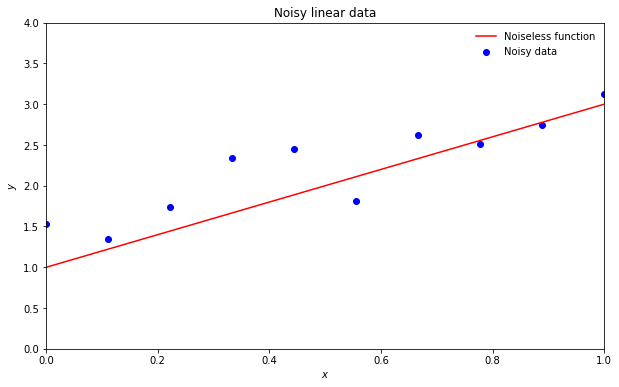

In [2]:
# Set random seed
rng = np.random.RandomState(0)

# Create noisy linear data
n_points = 10
x_train = np.linspace(0, 1, n_points)
y_train = 2 * x_train + 1 + rng.normal(0, 0.3, n_points)

# Noiseless function
f_noiseless = lambda x: 2 * x + 1

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_train, f_noiseless(x_train), color='red', label='Noiseless function')
plt.scatter(x_train, y_train, color='blue', label='Noisy data')
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Noisy linear data')
plt.legend(frameon=False)
plt.show()

### 1.1.2 Fit the noisy data

Here we fit the noisy data using linear regression. For linear regression with a basis $\mathbf{\phi}(x)$, we seek to find a solution $y = \mathbf{w}^\top \mathbf{\phi}(x)$, where $\mathbf{w}$ is a $k$-dimensional vector of weights that minimizes the mean squared error (MSE). The MSE produced by a set of training data is given by the empirical error, $\mathcal{E}_{\text{emp}}(\mathbf{w})$:
$$
    \mathcal{E}_{\text{emp}}(\mathbf{w}) = \frac{1}{m}(\mathbf{\Phi}\mathbf{w} - \mathbf{y})^\top (\mathbf{\Phi}\mathbf{w} - \mathbf{y})
$$
where $m$ is the number of training points, $\mathbf{y}\in\mathbb{R}^m$ is the vector of labels in $\mathcal{D} = \{(x_i,y_i)\}_{1\leq i \leq m}$, and $\mathbf{\Phi}\in\mathbb{R}^{m\times k}$ is the data matrix defined by $\Phi_{ij} = \phi_j(x_i)$. Minimizing the MSE with respect to $\mathbf{w}$ yields the solution
$$
    \mathbf{w}^* = (\mathbf{\Phi}^\top\mathbf{\Phi})^{-1}\mathbf{\Phi}^\top\mathbf{y} = \mathbf{\Phi}^+\mathbf{y}
$$ath
where $\mathbf{\Phi}^+ = (\mathbf{\Phi}^\top\mathbf{\Phi})^{-1}\mathbf{\Phi}^\top$ is the pseudoinverse of $\mathbf{\Phi}$. The corresponding function fitted to the data is given by
$$
    \hat{y}(x) = \mathbf{w}^{*\top} \mathbf{\phi}(x)
$$
In the case of simple linear regression with a bias (intercept) term, $\mathbf{\phi}(\mathbf{x}) = (1,x)^\top$. My own implementation is given by the `MyLinearRegression` class in `linear_regression.py`. An implementation with `sklearn` is also given below (as a sanity check).

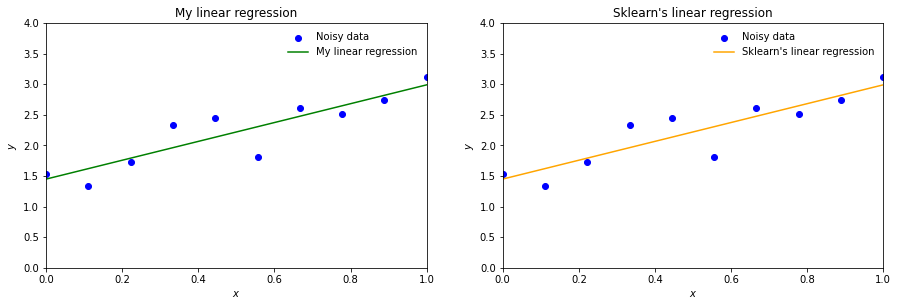

In [3]:
# My linear regression code
my_linreg = MyLinearRegression(linear_intercept=True)
my_linreg.fit(x_train, y_train)
y_pred = my_linreg.predict(x_train)

# Sklearn's linear regression code
sk_linreg = LinearRegression()
sk_linreg.fit(x_train.reshape(-1, 1), y_train)
y_pred_sk = sk_linreg.predict(x_train.reshape(-1, 1))

# Plot the results on two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4.5))
ax1.scatter(x_train, y_train, color='blue', label='Noisy data')
ax1.plot(x_train, y_pred, color='green', label='My linear regression')
ax1.set_title('My linear regression')
ax1.legend(frameon=False)
ax2.scatter(x_train, y_train, color='blue', label='Noisy data')
ax2.plot(x_train, y_pred_sk, color='orange', label='Sklearn\'s linear regression')
ax2.set_title('Sklearn\'s linear regression')
ax2.legend(frameon=False)

for ax in [ax1, ax2]:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 4)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

plt.show()

## 1.2 Using a feature map

Now consider a polynomial feature map:
$$
\mathbf{\phi}(\mathbf{x}) = 
\begin{pmatrix}
    1\\
    x\\
    x^2\\
    \vdots\\
    x_{k-1}
\end{pmatrix}
\in \mathbb{R}^k
$$
which we will use to fit a polynomial of order $k-1$ to noisy data.

### 1.2.1 Generate noisy data
The noisy data for this example is generated with the function
$$
f(x) = x^3 - x^2 + 1 + \epsilon
$$
$$
\epsilon \sim \mathcal{N}(0,0.03^2)
$$
for `n_points` $x$-values uniformly sampled on $[0,1]$. The noisy data is plotted below.

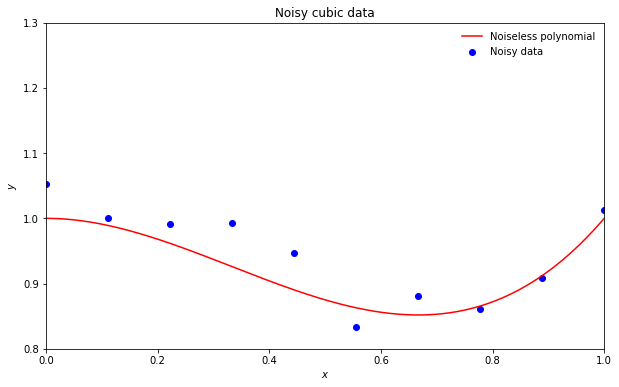

In [4]:
rng = np.random.RandomState(0)

# Create noisy data
n_points = 10
x_train = np.linspace(0, 1, n_points)
y_train = x_train**3 - x_train**2 + 1 + rng.normal(0, 0.03, n_points)

x_noiseless = np.linspace(0, 1, 1000)
polynomial_noiseless = lambda x: x**3 - x**2 + 1

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_noiseless, polynomial_noiseless(x_noiseless), color='red', label='Noiseless polynomial')
plt.scatter(x_train, y_train, color='blue', label='Noisy data')
plt.xlim(0, 1)
plt.ylim(0.8,1.3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Noisy cubic data')
plt.legend(frameon=False)
plt.show()

### 1.2.2 Fit the noisy data with a polynomial

k = 3: MSE = 0.00152
k = 5: MSE = 0.00052
k = 10: MSE = 0.00000


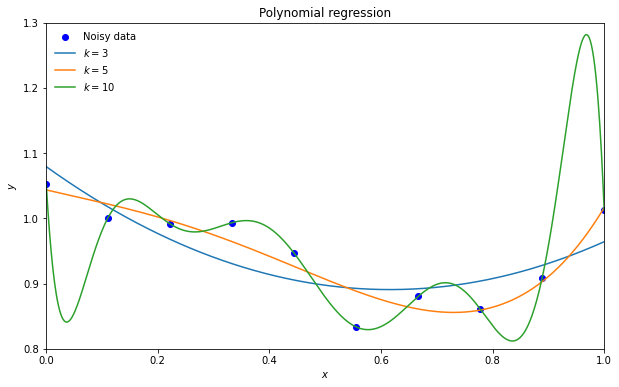

In [26]:
# Get design matrix for feature map of length k
def get_Phi(k, x_vals):
    """
    Generate a data matrix given data and number of basis functions.
    
    Args:
        k (int): number of basis functions
        x_vals (array): array of data values
    
    Returns:
        array: data matrix of shape (n_points, k)
    """
    return np.array([x_vals**i for i in range(k)]).T

# My linear regression code
my_linreg = MyLinearRegression()

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Noisy data')

for k in [3,5,10]:
    Phi = get_Phi(k, x_train)
    my_linreg.fit(Phi, y_train)
    y_pred = my_linreg.predict(get_Phi(k, x_noiseless))
    
    # Compute MSE
    mse = my_linreg.mse(Phi, y_train)
    print(f'k = {k}: MSE = {mse:.5f}')
    
    plt.plot(x_noiseless, y_pred, label=f'$k={k}$')

plt.xlim(0, 1)
plt.ylim(0.8,1.3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Polynomial regression')
plt.legend(frameon=False)
plt.show()

As you can see, for $k=10$ we can choose weights such that the fitted polynomial passes exactly through the $10$ data points (MSE = $0$). Typically we would say that this is *overfitted*; our model is too complex and will not generalise well to test data points. Regularisation can help with this.

# 1.3 Regularisation - Ridge regression
Now consider penalising the empirical MSE with a term depending on the $L2$ norm of the weight vector:
$$
    \mathcal{E}_{\text{emp}}(\mathbf{w}) = \frac{1}{m}(\mathbf{\Phi}\mathbf{w} - \mathbf{y})^\top (\mathbf{\Phi}\mathbf{w} - \mathbf{y}) + \alpha \| \mathbf{w}\|^2
$$
for some $\alpha\in\mathbb{R}_+$. This extra penalty acts as a smoothing term to prevent overcomplicated models. Regression with an $L2$ regulariser is known as **ridge regression**. The weight vector is given by
$$
    \mathbf{w}^* = (\mathbf{\Phi}^\top\mathbf{\Phi} + \alpha I_k)^{-1}\mathbf{\Phi}^\top\mathbf{y}
$$
where $I_k$ is the $k\times k$ identity matrix (and $k$ is the dimensionality of the feature map $\mathbf{\phi} : \mathbb{R} \to \mathbb{R}^k$).

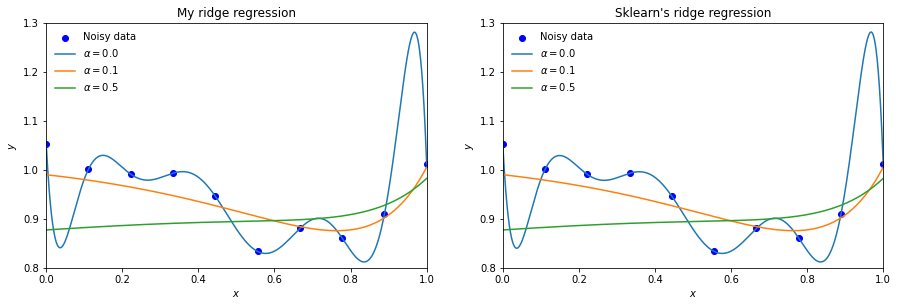

In [36]:
# Set k value for this example
k = 10

# Initialise regression classes
my_ridgereg = MyLinearRegression()
sk_ridgereg = Ridge(fit_intercept=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4.5))
ax1.scatter(x_train, y_train, color='blue', label='Noisy data')
ax2.scatter(x_train, y_train, color='blue', label='Noisy data')

# Plot for different values of alpha
for alpha in [0.0, 0.1, 0.5]:
    Phi = get_Phi(k, x_train)

    # My ridge regression code
    my_ridgereg.fit(Phi, y_train, alpha=alpha)
    y_pred = my_ridgereg.predict(get_Phi(k, x_noiseless))

    # Sklearn's ridge regression code
    sk_ridgereg.set_params(alpha=alpha)
    sk_ridgereg.fit(Phi, y_train)
    y_pred_sk = sk_ridgereg.predict(get_Phi(k, x_noiseless))

    # Plot the results
    ax1.plot(x_noiseless, y_pred, label=f'$\\alpha={alpha}$')
    ax2.plot(x_noiseless, y_pred_sk, label=f'$\\alpha={alpha}$')
    ax1.title.set_text('My ridge regression')
    ax2.title.set_text('Sklearn\'s ridge regression')

for ax in [ax1, ax2]:
    ax.set_xlim(0, 1)
    ax.set_ylim(0.8,1.3)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend(frameon=False)

plt.show()

The regulariser is clearly smoothing the model, which can be used to help prevent against overfitting.